Notebook for 27-1-2025, 10:00-11:00 of Stochastic Dynamical Modeling 

In [1]:
## Libraries

from pylab import *
import numpy
import datetime
import time
import glob, os
import math
import matplotlib.colors as colors
from scipy import stats

In [2]:
## Helpful functions 

def TrendRemover(time, data, trend_type):
    """Removes trend of choice, 1 = linear, 2 = quadratic, etc."""
   	
    rank     = polyfit(time, data, trend_type)
    fitting  = np.zeros(len(time))
  		
    for rank_i in range(len(rank)):
        #Get the least-squre fit
        fitting += rank[rank_i] * (time**(len(rank) - 1 - rank_i))
    
    #Subtract the fitted output
    data -= fitting
   	
    return data
	
def FourierSpectrum(time_series):
    """Determine the Fourier Spectrum of a given time series"""
    
    freq_series 	= fft(time_series) 					#Take fourier spectrum
    freq_series 	= ((real(freq_series)**2.0) + (imag(freq_series)**2.0)) #Determine power law (absolute value)
    freq		= fftfreq(len(time_series))
    freq_series 	= freq_series[:freq.argmax()]				#Restrict to f = 0.5
    freq		= freq[:freq.argmax()]					#Restrict to f = 0.5
    
    return freq, freq_series
    
def YearConverter(X):

    V = (1.0/(X)/365.0)

    return ["%.0f" % z for z in V]

In [3]:
## Read data file 

file = open('SSH_SST_Pacific.txt', 'r')
lines = file.readlines()
file.close()

time    = np.zeros(len(lines) - 3)
ssh     = np.zeros(len(time))
temp    = np.zeros(len(time))

for time_i in range(len(time)):
    #Read in the data
    line = lines[time_i + 3].split()

    #Save the corresponding data in the relevant array
    year            = int(line[2])
    
    if year != int(time[time_i-1]):
        #New year, reset counter
        counter     = 0
        
        if year % 4 == 0:
            #Leap year
            num_day     = 366
        else: 
            #Normal year
            num_day = 365
        
    time[time_i]    = year + counter / num_day
    ssh[time_i]     = float(line[3])
    temp[time_i]    = float(line[4])
    counter         += 1

Text(0.5, 1.0, 'Sea surface temperature')

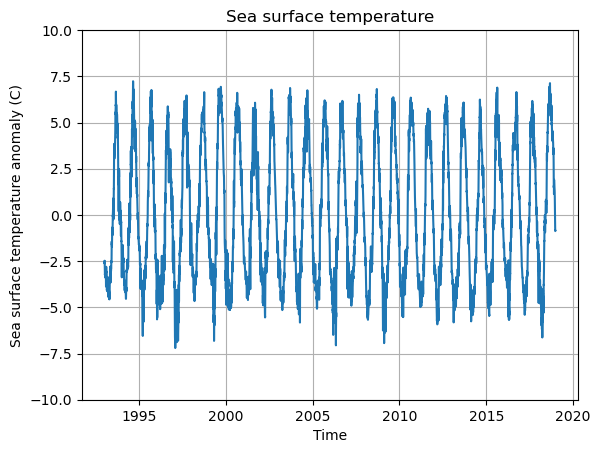

In [4]:
# Exercise 1: Plot the temperature anomaly time series with respect to the mean

temp     = temp - np.mean(temp)

fig, ax = subplots()

ax.plot(time, temp, linestyle = '-', marker = None)

ax.set_xlabel('Time')
ax.set_ylabel('Sea surface temperature anomaly (C)')
ax.set_ylim(-10, 10)
ax.grid()
ax.set_title('Sea surface temperature')


Text(0, 0.5, 'Power')

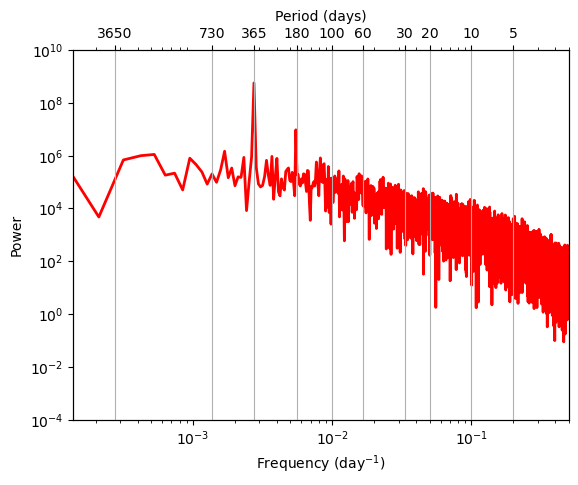

In [11]:
## Exercise 2: Remove trend and compute + plot the Fourier spectrum of the resulting time series 

temp    = TrendRemover(time, temp, 1)
      
freq, freq_temp = FourierSpectrum(temp)

index       = np.where(freq >= 1.0 / 60.0)

fig, ax1 = plt.subplots()

ax1.set_xlim([1.0/(20 * 365.0), 0.5])
ax1.set_xlabel('Frequency (day$^{-1}$)')
ax2 = ax1.twiny()

new_tick_locations = np.array([1.0/(365.0 * 10), 1.0/(365.0 * 2), 1.0/(365.0), 1.0/(6 * 30), 1.0/(100), 1.0/(2 * 30), 1.0/(1 * 30), 1.0 / (20.0), 1.0 / (10.0), 1.0/5.0])
ax2.set_xlabel('Period (days)')
ax2.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels([3650, 730, 365, 180, 100, 60, 30, 20, 10, 5])
ax2.grid()

graph_temp	= ax1.plot(freq, freq_temp, '-r', linewidth = 2, label = 'SST')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10**(-4.0), 10**(10.0))
ax1.set_ylabel('Power')

#show()

Text(0, 0.5, 'Power')

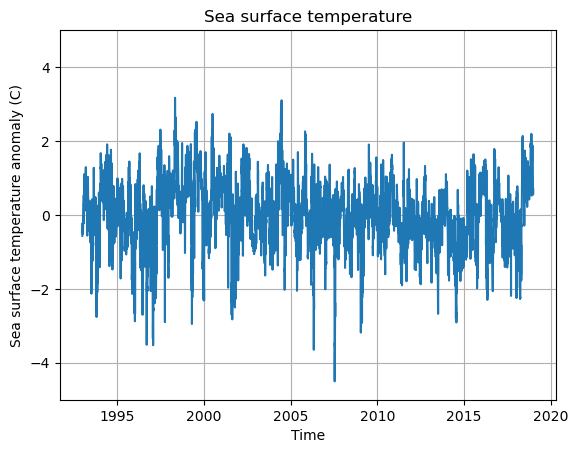

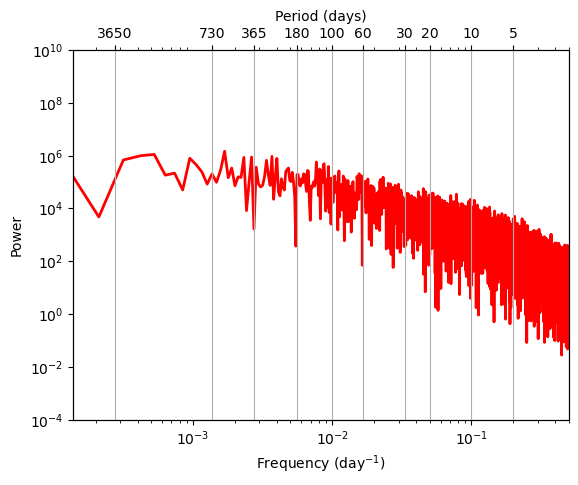

In [12]:
## Exercise 3: Seasonal detrend the time series, plot the resulting time series and  power spectrum

from statsmodels.tsa.seasonal import seasonal_decompose
#np.interp(np.arange(len(temp)), 
#          np.arange(len(temp))[np.isnan(temp) == False], 
#          temp[np.isnan(temp) == False])
decomposition = seasonal_decompose(temp, model='additive',period=365)
deseason_temp = temp - decomposition.seasonal

fig, ax = subplots()

#ax.plot(time, ddecomposition.seasonal, linestyle = '-', marker = None)
ax.plot(time, deseason_temp, linestyle = '-', marker = None)

ax.set_xlabel('Time')
ax.set_ylabel('Sea surface temperature anomaly (C)')
ax.set_ylim(-5, 5)
ax.grid()
ax.set_title('Sea surface temperature')

freq, freq_temp = FourierSpectrum(deseason_temp)

index       = np.where(freq >= 1.0 / 60.0)

fig, ax1 = plt.subplots()

ax1.set_xlim([1.0/(20 * 365.0), 0.5])
ax1.set_xlabel('Frequency (day$^{-1}$)')
ax2 = ax1.twiny()

new_tick_locations = np.array([1.0/(365.0 * 10), 1.0/(365.0 * 2), 1.0/(365.0), 1.0/(6 * 30), 1.0/(100), 1.0/(2 * 30), 1.0/(1 * 30), 1.0 / (20.0), 1.0 / (10.0), 1.0/5.0])
ax2.set_xlabel('Period (days)')
ax2.set_xscale('log')

ax2.set_xlim(ax1.get_xlim())
ax2.set_xticks(new_tick_locations)
ax2.set_xticklabels([3650, 730, 365, 180, 100, 60, 30, 20, 10, 5])
ax2.grid()

graph_temp	= ax1.plot(freq, freq_temp, '-r', linewidth = 2, label = 'SST')

ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_ylim(10**(-4.0), 10**(10.0))
ax1.set_ylabel('Power')

#show()


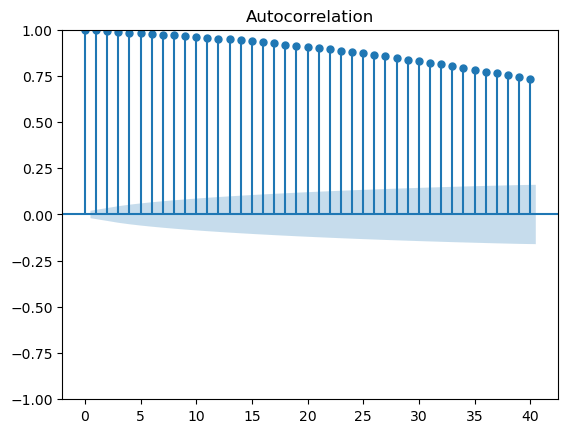

In [13]:
## Exercise 4: Determine and plot the autocorrelation of the seasonally detrended time series  

from statsmodels.graphics.tsaplots import plot_acf
plot_acf(temp)

import statsmodels.api as sm

#calculate autocorrelations
adata = sm.tsa.acf(deseason_temp,nlags = 10, fft = False)

Step 5: Compute the histogram and moments of the deseasonalized time series

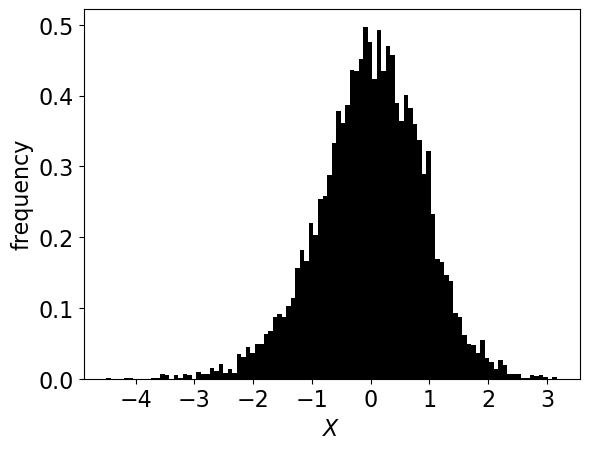

0.0 0.8011356526924347 -0.22791038000965153 2.341301067130332


In [14]:
## Exercise 5: Plot the histogram and compute the moments of the deseasonalized time series

import scipy
from scipy.stats import skew, kurtosis

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.hist(deseason_temp, bins = 100, density=True,color='black')
plt.xlabel(r'$X$',fontsize=16); 
plt.ylabel(r'frequency',fontsize=16,rotation=90)
plt.show()

M1 = scipy.stats.moment(deseason_temp,moment = 1)
M2 = scipy.stats.moment(deseason_temp,moment = 2)
M3 = scipy.stats.moment(deseason_temp,moment = 3)
M4 = scipy.stats.moment(deseason_temp,moment = 4)

print(M1,M2,M3,M4)
